# Pneumonia Detection using chest X-ray images (Pytorch Implementation)

## Connecting to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


## Dataset Preparation

In [ ]:
'''
In our original dataset, the number of samples in validation is very less 
compared to that of training examples. But, in general, for deep learning 
projects, we will need to split our overall dataset into 80% for training and
20% for validation ensuring better model evaluation. This is why, in the code 
below, we split our training samplesinto 80% training data and 20% validation 
data which we will use for our analysis later.

Also, we will only use total of 2176 data samples for our model building inorder
to reduce training/testing time. However sudents are free to use the whole 
dataset and evaluate the model performance. This allows room for students to
explore and learn the impact of data size and quaity.
'''

# Import useful modules
import os
import shutil
import random

# Declare and initialize required path variables
root_dir = "chest_xray"
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "val")
test_dir = os.path.join(root_dir, "test")

train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

val_normal_dir = os.path.join(val_dir, "NORMAL")
val_pneumonia_dir = os.path.join(val_dir, "PNEUMONIA")

test_normal_dir = os.path.join(test_dir, "NORMAL")
test_pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

# Getting names of files based on labels. This is important to ensure we have equal samples from each class in our new dataset.
t_normal = [name for name in os.listdir(train_normal_dir) if os.path.isfile(os.path.join(train_normal_dir, name))] # Get list of filenames within dir NORMAL
t_viral = [name for name in os.listdir(train_pneumonia_dir) if os.path.isfile(os.path.join(train_pneumonia_dir, name)) and "virus" in name] # Get list of filenames within dir PNEUMONIA having viral substring
t_bacteria = [name for name in os.listdir(train_pneumonia_dir) if (os.path.isfile(os.path.join(train_pneumonia_dir, name)) and "bacteria" in name)] # Get list of filenames within dir PNEUMONIA having bacteria substring

v_normal = [name for name in os.listdir(train_normal_dir) if os.path.isfile(os.path.join(train_normal_dir, name))] # Get list of filenames within dir NORMAL
v_viral = [name for name in os.listdir(train_pneumonia_dir) if os.path.isfile(os.path.join(train_pneumonia_dir, name)) and "virus" in name] # Get list of filenames within dir PNEUMONIA having viral substring
v_bacteria = [name for name in os.listdir(train_pneumonia_dir) if (os.path.isfile(os.path.join(train_pneumonia_dir, name)) and "bacteria" in name)] # Get list of filenames within dir PNEUMONIA having bacteria substring

te_normal = [name for name in os.listdir(test_normal_dir) if os.path.isfile(os.path.join(test_normal_dir, name))] # Get list of filenames within dir NORMAL
te_viral = [name for name in os.listdir(test_pneumonia_dir) if os.path.isfile(os.path.join(test_pneumonia_dir, name)) and "virus" in name] # Get list of filenames within dir PNEUMONIA having viral substring
te_bacteria = [name for name in os.listdir(test_pneumonia_dir) if (os.path.isfile(os.path.join(test_pneumonia_dir, name)) and "bacteria" in name)] # Get list of filenames within dir PNEUMONIA having bacteria substring

# 1280
print(len(v_normal), len(v_viral), len(v_bacteria)) # 448 test/val

random.seed(1233)

# Uncomment the code below to get desired size of train/test/val sample files.
# train_sample_files = random.sample(t_normal, 640) + random.sample(t_viral, 320) + random.sample(t_bacteria, 320)
# len(train_sample_files)
# val_sample_files = random.sample(v_normal, 224) + random.sample(v_viral, 112) + random.sample(v_bacteria, 112)
# len(val_sample_files)
# test_sample_files = random.sample(te_normal, 224) + random.sample(te_viral, 112) + random.sample(te_bacteria, 112)

477 913 2098


In [ ]:
# Function to move file from source dir to destination dir.
def move_files(src_dir, des_dir, files):
  for file in files:
    if os.path.exists(os.path.join(src_dir, file)):
      shutil.move(os.path.join(src_dir, file), os.path.join(des_dir, file))

"""
Uncomment code below to move data from original folder to your destination 
folder. The original folder is the folder that contains your whole dataset, while
destination folder is the folder that you created to store your chosen dataset.
The structure of destination folder looks like below:
data
---- train
---------- normal
---------- pneumonia
---- valid
---------- normal
---------- pneumonia
---- test
---------- normal
---------- pneumonia
"""
# root_dir = "data"
# move_files(train_normal_dir, os.path.join(root_dir, "train/normal"), train_sample_files)
# move_files(train_pneumonia_dir, os.path.join(root_dir, "train/pneumonia"), train_sample_files)

# move_files(train_normal_dir, os.path.join(root_dir, "valid/normal"), val_sample_files)
# move_files(train_pneumonia_dir, os.path.join(root_dir, "valid/pneumonia"), val_sample_files)

# move_files(test_normal_dir, os.path.join(root_dir, "test/normal"), test_sample_files)
# move_files(test_pneumonia_dir, os.path.join(root_dir, "test/pneumonia"), test_sample_files)

In [ ]:
'''
Prepare train/val/test samples.
'''

# Import useful modules
import os
import torchvision
from torchvision.transforms import ToTensor, Compose, Resize

root_dir = "data"

# Define path to data
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "valid")
test_dir = os.path.join(root_dir, "test")

# Create PyTorch dataset format using PyTorch's ImageFolder dataset structure
train_ds = torchvision.datasets.ImageFolder(train_dir, transform = Compose([Resize((224, 224)), ToTensor()]))
valid_ds = torchvision.datasets.ImageFolder(val_dir, transform = Compose([Resize((224, 224)), ToTensor()]))
test_ds = torchvision.datasets.ImageFolder(test_dir, transform= Compose([Resize((224, 224)), ToTensor()]))

In [ ]:
print("Total training samples: {0}\t Total validation samples: {1}\t Total test samples: {2}".format(len(train_ds), len(valid_ds), len(test_ds)))

Total training samples: 1280	 Total validation samples: 448	 Total test samples: 448


In [ ]:
train_ds.find_classes("data/train")

(['normal', 'pneumonia'], {'normal': 0, 'pneumonia': 1})

## Model Building

### Define Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Uncomment line below if running for the first time. We need to install the 
# module first.
!pip install transformers 
from transformers import ViTModel, ViTPreTrainedModel, ViTConfig


class ViTForImageClassification(ViTPreTrainedModel):
    def __init__(self, config: ViTConfig):
        super().__init__(config)
        # super(ViTForImageClassification, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, pixel_values, labels=None):
        outputs = self.vit(pixel_values=pixel_values)
        sequence_output = outputs[0]
        logits = self.classifier(sequence_output[:, 0, :])

        loss = None
        if labels is not None:
          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        if loss is not None:
          return logits, loss.item()
        else:
          return logits, None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.6 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Uncomment line below if running for the first time. We need to install the 
# module first.
# !pip install transformers 
from transformers import ViTModel, ViTConfig


class ViTForImageClassification(ViTPreTrainedModel):
    def __init__(self, config: ViTConfig):
        super().__init__(config)
        self.vit = ViTModel(config, add_pooling_layer=False)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Initialize weights and apply final processing
        self.post_init()

    def forward(self, pixel_values, labels=None):
        outputs = self.vit(pixel_values=pixel_values)
        sequence_output = outputs[0]
        logits = self.classifier(sequence_output[:, 0, :])

        loss = None
        if labels is not None:
          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
    
        return logits, loss

### Define Model Parameters

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 2e-5

### Define feature extractor, optimizer, loss

1. Feature Extractor
A feature extractor is in charge of preparing input features for audio or vision models. This includes feature extraction from sequences, e.g., pre-processing audio files to Log-Mel Spectrogram features, feature extraction from images e.g. cropping image image files, but also padding, normalization, and conversion to Numpy, PyTorch, and TensorFlow tensors. 

 We will be using ViTFeatureExtractor class in order to tranform our inpur image data into the required format so that it can be fed to VIT model for training purpose.


2. Optimizer
While trianing any deep learning model, our goal is to update the weights of the neurons, and optimize the loss function such that model makes better prediction. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rates. Thus, it helps in reducing the overall loss and improving accuracy. You can use different optimizers in the machine learning model to make changes in your weights and learning rate. However, choosing the best optimizer depends upon the application.

 For medical imaging, the mostly tried and tested optimizer is Adam optmizer due to its promising performance. We will use the same for our model.

3. Loss function
In simple terms, the Loss function is a method of evaluating how well your algorithm is modeling your dataset. It is a mathematical function of the parameters of the machine learning algorithm.



In [ ]:
import torch
import torch.nn as nn
from transformers import ViTFeatureExtractor, ViTConfig

config = ViTConfig(num_labels=2)

# Define Model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k') 

# Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Cross Entropy Loss
loss_func = nn.CrossEntropyLoss()

# Use GPU if available  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
if torch.cuda.is_available():
    model.cuda() 

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Model Training

In [ ]:
import numpy as np
import torch.utils.data as data
from torch.autograd import Variable


print("Number of train samples: ", len(train_ds))
print("Number of validation samples: ", len(valid_ds))
print("Number of test samples: ", len(test_ds))
print("Detected Classes are: ", train_ds.class_to_idx) 

# The main goal of using data loader is to load only required amount of data in
# memory during training/validating/testing phase. This is useful while training
# our models on large volume of data.
train_loader = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
val_loader = data.DataLoader(valid_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
test_loader  = data.DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) 

Number of train samples:  1280
Number of validation samples:  448
Number of test samples:  448
Detected Classes are:  {'normal': 0, 'pneumonia': 1}


In [ ]:
log_interval = 10
val_interval = 1200
save_interval = 1
save_path = "models"
model_name = "VIT"
min_valid_loss = np.inf

# Train the model
for epoch in range(EPOCHS):
  train_loss = 0.0
  train_acc = 0.0
  model.train()
  for step, (x, y) in enumerate(train_loader):
    # Change input array into list with each batch being one element
    x = np.split(np.squeeze(np.array(x)), BATCH_SIZE)

    # Remove unecessary dimension
    for index, array in enumerate(x):
      x[index] = np.squeeze(array)

    # Apply feature extractor, stack back into 1 tensor and then convert to tensor
    x = torch.tensor(np.stack(feature_extractor(x)['pixel_values'], axis=0))

    # Send to GPU if available
    x, y  = x.to(device), y.to(device)
    b_x = Variable(x)   # batch x (image)
    b_y = Variable(y)   # batch y (target)    

    # Feed through model
    optimizer.zero_grad() 
    output, _ = model(b_x, None)
    # Calculate loss
    loss = loss_func(output, b_y)     
    loss.backward()                 
    optimizer.step()

    train_pred = output.argmax(1)
    train_acc += (train_pred == y).sum().item() 
    train_loss += loss.item()

    if step % val_interval == 0:
      val_loss = 0.0
      val_acc = 0.0
      model.eval()
      with torch.no_grad():
        for data, target in val_loader:
          # Reshape and get feature matrices as needed
          val_x = np.split(np.squeeze(np.array(data)), BATCH_SIZE)
          for index, array in enumerate(val_x):
            val_x[index] = np.squeeze(array)
          val_x = torch.tensor(np.stack(feature_extractor(val_x)['pixel_values'], axis=0))

          # Send to appropirate computing device
          val_X = val_x.to(device)
          val_y = target.to(device)

          # Get output (+ respective class) and compare to target
          val_output, _ = model(val_X)
          val_loss += loss_func(val_output, val_y).item()
          pred = val_output.argmax(1)
          val_acc += (pred == val_y).sum().item()
  print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {val_loss / len(val_loader)} \t\t Training acc: {train_acc / len(train_loader)} \t\t Validation Acc: {val_acc / len(val_loader)}')
  if min_valid_loss > val_loss/len(val_loader):
    print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{val_loss/len(val_loader):.6f}) \t Saving The Model')
    min_valid_loss = val_loss/len(val_loader)
      
    # Saving State Dict
    os.makedirs(save_path, exist_ok=True)
    torch.save(
        model.state_dict(),
        os.path.join(save_path, "model2{}_{}.pth".format(model_name, epoch)),
    )
    torch.save(
        model.state_dict(),
        os.path.join(save_path, "model2{}_{}.pt".format(model_name, epoch)),
    )

Epoch 1 		 Training Loss: 0.39221871756017207 		 Validation Loss: 0.6846045127936772 		 Training acc: 28.325 		 Validation Acc: 16.357142857142858
Validation Loss Decreased(inf--->0.684605) 	 Saving The Model
Epoch 2 		 Training Loss: 0.13031534450128673 		 Validation Loss: 0.16240052293453897 		 Training acc: 30.975 		 Validation Acc: 31.142857142857142
Validation Loss Decreased(0.017115--->0.162401) 	 Saving The Model
Epoch 3 		 Training Loss: 0.08539832560345531 		 Validation Loss: 0.1038438409034695 		 Training acc: 31.25 		 Validation Acc: 31.142857142857142
Validation Loss Decreased(0.004060--->0.103844) 	 Saving The Model
Epoch 4 		 Training Loss: 0.05669448529370129 		 Validation Loss: 0.08033407186823231 		 Training acc: 31.625 		 Validation Acc: 31.214285714285715
Validation Loss Decreased(0.002596--->0.080334) 	 Saving The Model
Epoch 5 		 Training Loss: 0.03647224097512662 		 Validation Loss: 0.06599808125091451 		 Training acc: 31.825 		 Validation Acc: 31.357142857142858


## Model Testing and Evaluation
This is crucial stage in building any machine learning or  deep learning model. There are several ways to validate or evaluate model performance. However, chossing which one to use heavily depends upon the usecase and the nature of data model was trained on.

In our analysis, as we are building a model to predict if a person has pneumonia or not, only taking accuracy as evaluation metrics might not be sufficient. Because, in healthcare, we donot want a patient to report false positive or false negative results. Thus, we will need to evaluate our model using other metrics as well.

We will use precision, recall, and F1-score along with model accuracy as important evaluation metrics for our classifier.

In [ ]:
from sklearn.metrics import confusion_matrix

model_path = "models/model2VIT_4.pth"
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')  
model.load_state_dict(torch.load(model_path,  map_location=device))

# Test Model
model.eval()
correct = 0
total = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
y_true_list = []
y_pred_list = []

with torch.no_grad():
  for i, (x, y) in enumerate(test_loader):
    test_x = np.split(np.squeeze(np.array(x)), BATCH_SIZE)
    for index, array in enumerate(test_x):
      test_x[index] = np.squeeze(array)
    test_x = torch.tensor(np.stack(feature_extractor(test_x)['pixel_values'], axis=0))

    # Send to appropirate computing device
    test_X = test_x.to(device)
    test_y = y.to(device)

    y_pred, _ = model(test_x)
    predicted = y_pred.argmax(1)

    y_true_list.extend(y.cpu().numpy())
    y_pred_list.extend(predicted.cpu().numpy())

    total += y.size(0)
    correct += (predicted == y).sum().item()
    false_positive += sum(bool(x) for x in (predicted == 1) & (y == 0))
    false_negative += sum(bool(x) for x in (predicted == 0) & (y == 1))
    true_positive += sum(bool(x) for x in (predicted == 1) & (y == 1))
    true_negative += sum(bool(x) for x in (predicted == 0) & (y == 0))

print(f"True positive: {true_positive}")
print(f"True negative: {true_negative}")
print(f"False positive: {false_positive}")
print(f"False negative: {false_negative}")
print(f"Precision: {true_positive / (true_positive + false_positive)}")
print(f"Recall: {true_positive / (true_positive + false_negative)}")
# print(f"F1 score: {2 * true_positive / (2 * true_positive + false_positive + false_negative)}")
print(f"Specificity: {true_negative / (true_negative + false_positive)}")
print(f"Accuracy: {100 * correct / total}%")

cm = confusion_matrix(y_true_list, y_pred_list)

f1_list = []
for idx,(i,j,k) in enumerate(zip(cm.sum(axis=1), cm.sum(axis=0), cm.diagonal())):
    f1 = 2 * k / (i + j)
    print(f"F1 score for class {idx}: {f1}")
    f1_list.append(f1)
print(f"Mean F1 score: {np.mean(f1_list)}")


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


True positive: 223
True negative: 156
False positive: 68
False negative: 1
Precision: 0.7663230240549829
Recall: 0.9955357142857143
Specificity: 0.6964285714285714
Accuracy: 84.59821428571429%
F1 score for class 0: 0.8188976377952756
F1 score for class 1: 0.8660194174757282
Mean F1 score: 0.8424585276355019


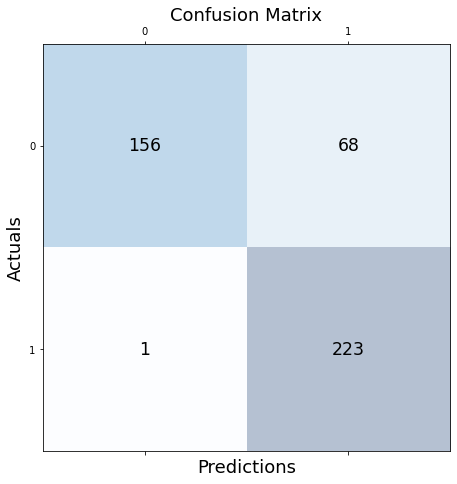

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
plt.savefig("confusion_matrix_vit.png")

## Upload Model to Huggingface

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from huggingface_hub import HfApi

api = HfApi()

In [ ]:
# Create your repo first to upload the model
api.create_repo(repo_id="vit-pneumonia-detector")

RepoUrl('https://huggingface.co/niki-stha/vit-pneumonia-detector', endpoint='https://huggingface.co', repo_type='model', repo_id='niki-stha/vit-pneumonia-detector')

In [ ]:
# Upload your model to huggingface. You can clone the repo anytime to use the model.
model.push_to_hub("vit-pneumonia-detector")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/niki-stha/vit-pneumonia-detector/commit/af039a842b79dc5f7a48f05938f2c180018f4d84', commit_message='Upload ViTForImageClassification', commit_description='', oid='af039a842b79dc5f7a48f05938f2c180018f4d84', pr_url=None, pr_revision=None, pr_num=None)

## SMS feature
[link here](https://www.twilio.com/code-exchange/sms-notifications)

## Model Architecture

In [ ]:
print(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_